In [ ]:
!pip install nltk
!pip install textblob

In [ ]:
#TODO
#Change Comma delimiter into semicolon delimeter or some other char, because people use comma in their reviews.
#Change the code so that same dates on different notebooks will be merged to one

In [2]:
#Import Libraries for sentiment analysis, tokenizing data
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
import pandas as pd
import os
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#Load reviews from csv file

#reviews=pd.read_csv()

time_start="04/16/2023"
time_end="04/19/2023"

stop_reading_data=False
i=1
list_reviews=[]
while (stop_reading_data==False):
    print(i)
    if(os.path.isfile("data_{}.csv".format(i))):
        data =pd.read_csv("data_{}.csv".format(i), sep=",", engine="python", error_bad_lines=False)
        if(len(data) !=0):
            data_end=str(data["at"][-1:]).split()[1].split('-')
            data_start=data["at"][0].split()[0].split("-")



            if(int(data_start[1])>int(time_start[:2])):
                stop_reading_data=True
            elif(int(data_end[1])<int(time_start[:2])):
                continue
            elif(int(data_start[1])==int(time_end[:2]) and int(data_start[2])>int(time_end[3:5])):
                 stop_reading_data=True
            elif(int(data_start[1])==int(time_end[:2]) and int(data_end[2])<int(time_start[3:5])):
                 continue
            else:
                
                #DOE DE ONDERZOEK.
                #VERGEET NIET DAT ALS DZELFDE DATUM IN TWEE CSV FILES VOORKOMT OM ZE NA DE ONDERZOEK TE COMBINEREN
                list_date=data["at"].apply(lambda x: x.split()[0].split("-"))
                print(list_date)

                k=0
                for j in range(1, len(list_date)):
                    
                    if(list_date[j][2]!=list_date[j-1][2]):
                        list_reviews.append([analyze_reviews(data["content"][k:j]),list_date[j]])
                        #print([analyze_reviews(data["content"][k:j]),list_date[j]])
                        k=j
        else:
            stop_reading_data=True
    else:
        stop_reading_data= True  
    i+=1



1
0      [2023, 04, 20]
1      [2023, 04, 20]
2      [2023, 04, 20]
3      [2023, 04, 20]
4      [2023, 04, 20]
            ...      
685    [2023, 04, 16]
686    [2023, 04, 16]
687    [2023, 04, 16]
688    [2023, 04, 16]
689    [2023, 04, 16]
Name: at, Length: 690, dtype: object


C:\Users\HP001\AppData\Local\Temp\ipykernel_4356\3322350975.py:14: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data =pd.read_csv("data_{}.csv".format(i), sep=",", engine="python", error_bad_lines=False)
Skipping line 2: ',' expected after '"'
Skipping line 8: ',' expected after '"'
Skipping line 12: ',' expected after '"'
Skipping line 13: ',' expected after '"'
Skipping line 25: ',' expected after '"'
Skipping line 26: ',' expected after '"'
Skipping line 28: ',' expected after '"'
Skipping line 29: ',' expected after '"'
Skipping line 31: ',' expected after '"'
Skipping line 33: ',' expected after '"'
Skipping line 34: ',' expected after '"'
Skipping line 37: ',' expected after '"'
Skipping line 42: ',' expected after '"'
Skipping line 46: ',' expected after '"'
Skipping line 48: ',' expected after '"'
Skipping line 49: ',' expected after '"'
Skipping line 50: ',' expected after '"'
Skipp

2


In [4]:
#Do the analysis
#Do the analysis on one review->Write function to automate the process for every review

#example review



#correct spelling
def analyze_reviews(reviews):
    keyword_list={}
    for review in reviews:
        review = str(TextBlob(review).correct())
        #tokenize review
        tokens = nltk.word_tokenize(review)
        #ignore stop_words
        stop_words = set(nltk.corpus.stopwords.words('english'))
        tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
        #get the sentiment of the review
        sentiment = TextBlob(review).sentiment.polarity
       # print("Keywords: ", tokens)
       # print("Sentiment polarity: ", sentiment)
        sentiment_in_words="neutral"
        if (sentiment<0):
            sentiment_in_words="negative"
        elif(sentiment>=0):
            sentiment_in_words="positive"
       # print(sentiment_in_words)
        #for every keyword, count how many times they appear in a negative respectively positive review
        for token in tokens:
            if token in keyword_list:
                if sentiment<0:
                    keyword_list[token][0]+=1
                elif sentiment>=0:
                    keyword_list[token][1]+=1
            else:
                if sentiment<0:
                    keyword_list[token]=[1,0]
                elif sentiment>=0:
                    keyword_list[token]=[0,1]
        
    return keyword_list







In [57]:


#Doel: Per Keyword Per Tijd aantal negatief en positieve reviews
#zorg ervoor dat voor elke datum een indice in de list_reviews is
def keyword_counter(keyword):
    list_time_keyword=[]
    for i in range(len(list_reviews)):
        if(keyword in list_reviews[i][0]):
            list_time_keyword.append([list_reviews[i][0][keyword], list_reviews[i][1]])
        else:
            list_time_keyword.append([[0,0], ['0','0','0']])
    return list_time_keyword



In [41]:
#look per date
import pandas
def make_graph(keyword, data_negative,data_positive,time_frame,time_start,time_end):
    
    x=[i for i in range(time_frame)]
    plt.title("Positive and Negative reviews with the keyword {}".format(keyword))
    plt.plot(x,data_negative, label="negative review", color="red")
    plt.plot(x,data_positive,label="positive review",color="blue")
    xi=pandas.date_range(time_start,time_end,freq='d')
    print(xi)
    plt.xticks(x,xi.strftime('%m/%d/%Y, 'r''))
    plt.legend()
    plt.show()

In [45]:
time_frame=4
time_start="04/16/2023"
time_end="04/19/2023"

In [116]:
keyword="ok"

In [117]:
list_time_keyword=keyword_counter(keyword)

In [118]:
data_negative=[list_time_keyword[i][0][0] for i in range(len(list_time_keyword))]
data_positive=[list_time_keyword[i][0][1] for i in range(len(list_time_keyword))]

In [119]:
list_time_keyword

[[[0, 1], ['2023', '04', '19']],
 [[0, 3], ['2023', '04', '18']],
 [[0, 0], ['0', '0', '0']],
 [[0, 1], ['2023', '04', '16']]]

DatetimeIndex(['2023-04-16', '2023-04-17', '2023-04-18', '2023-04-19'], dtype='datetime64[ns]', freq='D')


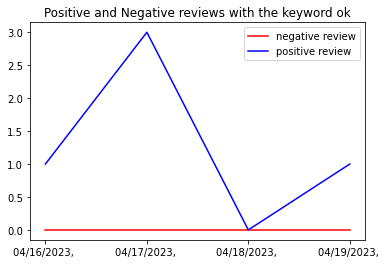

In [120]:
make_graph(keyword,data_negative,data_positive,time_frame,time_start,time_end)

In [190]:
#keyword recommendation system per day

day = "2023/04/19"


def keyword_recommendation(day):
    list_negative=[]
    list_positive=[]
    day_in_list = day.split("/")
    print(day_in_list)
    for i in range(len(list_reviews)):
        print(list_reviews[i][1])
        if(list_reviews[i][1]==day_in_list):
            #print(list_reviews[i][0])
            for j in list_reviews[i][0]:
                list_negative.append([j,list_reviews[i][0][j][0]])
                list_positive.append([j,list_reviews[i][0][j][1]])
            list_negative=sorted(list_negative,key=lambda x: x[1])
            list_positive=sorted(list_positive,key=lambda x:x[1])
            
            return [list_negative,list_positive]
            
                
                



In [193]:
(list_negative,list_positive) = keyword_recommendation(day)

['2023', '04', '19']
['2023', '04', '19']
